# Demo: Geomapping with Plotly - Some Basics

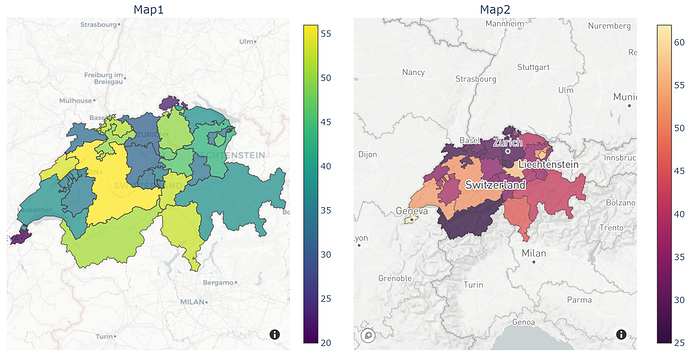

## Plotly
**Plotly** is an open source library for Python. It integrates greatly with Jupyter Notebook and Dash to create interactive content for websites. It can be used to create ad hoc charts and professional content.

Handling spatial data for Geo Mapping needs some additional datasets and basic setup before you can use it for visual data representation and analysis.

E.g.Choropleth Charts are colored shapes and those shapes are of course manyfold. If you read through [Plotly Documentation](https://plotly.com/python/choropleth-maps/) you can see that there are default shapes available in plotly for USA States and Countries as defined in the Natural Earth datasets.

To visualize data for Switzerland geo regions like **cantons**, **districts** or **municipalities**, we must explore other data sources for corresponding shapes to handle with.

---   
Source/Links:   
+ xxx
+ xxx
+ xxx

History:       
+ March 2024, v1, dbe --- adapted for BINA FS24

---  

## Introduction

### The **Latitude/Longitude** Geocoordinates  

**Latitude** (short `lat`) and **Longitude** (short `long`) are the units that represent the *(geo) coordinates* of a point (a location) at geographic coordinate system. See [Latitude and Longitude Finder](https://www.latlong.net/).

You can easily search for places and locations with [Google Maps](https://support.google.com/maps/answer/18539?hl=en&co=GENIE.Platform%3DDesktop) and identify the corresponding geo coordinates (as lat/long pair)

> See [Federal Office of Topography **swisstopo**](https://www.swisstopo.admin.ch/en/coordinates-conversion-navref) for more details on the SwissGrid vs. WGS84 geographic coordinate systems and the [Swissgrid Center @600/200](https://maps.app.goo.gl/U7Fqd8cr2gtHW9bB9)   
> See [World Geodetic System (WGS84)](https://gisgeography.com/wgs84-world-geodetic-system/), but note that while WGS84 serves as *a global reference*, various regional geodetic datums (like the SwissGrid)  might be more accurate for specific areas. In such cases, coordinate transformations are used to convert between different datums and the WGS84 reference frame.

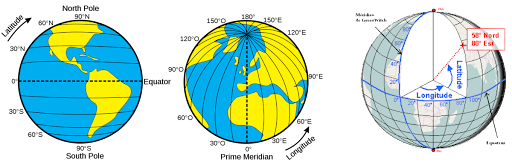

### The **GeoJSON** Format
The **GEOJSON format** may be look scary at first, but as for many things: If you break them down into atomic pieces and learn to understand how they work they are no longer frightening. Remember: JSON stands for *JavaScript Object Notation*  

A GeoJSON file is a format for encoding geographical data structures using JavaScript Object Notation (JSON). It is commonly used for representing geographic features, such as points, lines, and polygons, along with their associated attributes.

> See [GeoJSON@Mapbox](https://docs.mapbox.com/help/glossary/geojson/) for a detailed descritpion of this open standard file format for representing map data    
> Use [geojson.io](https://geojson.io) for analysing and visualizing geojson files

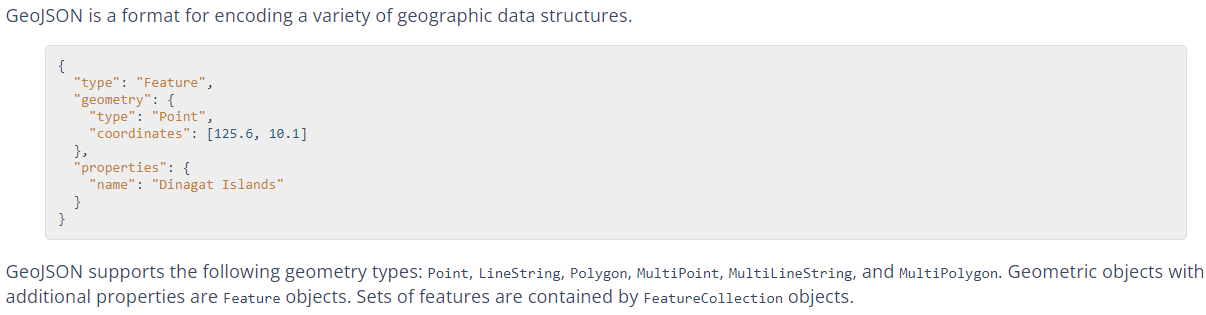

---  
## **Example 1** : A Simple Geo Map


+ To start off lets first define some **simple geo shapes**

We use very simple geometrical structures. **Rectangles** defined by their four corresponding endpoints (each described as `[lat,long]` pairs).

In [6]:
# define two rectangular geo shapes, using [lat,long] pairs as polygon mid/endpoints
shapes = {"type": "FeatureCollection",
          "features": [
              {
                  "id": "1",
                  "type": "Feature", "properties": {},
                  "geometry": {"type": "Polygon",
                       "coordinates": [[[8.00, 46.7], [8.00, 47.2], [7.00, 47.2], [7.00, 46.7],[8.00, 46.7]],
                                       [[7.75, 46.8], [7.75, 47.0], [7.25, 47.0], [7.25, 46.8],[7.75, 46.8]]
                                      ]},
              },
              {
                  "id": "2",
                  "type": "Feature", "properties": {},
                  "geometry": {"type": 'MultiPolygon',
                       "coordinates": [[[[9.00, 46.7], [9.00, 47.2], [8.00, 47.2], [8.00, 46.7],[9.00, 46.7]]],
                                       [[[7.75, 46.8], [7.75, 47.0], [7.25, 47.0], [7.25, 46.8],[7.75, 46.8]]]
                                      ]},
              },
          ]}

The above shapes variable contains a **FeatureCollection**
+ The feature with **id 1** describes a rectangle polygon with a rectangle "hole".
+ The feature with **id 2** consists of two polygons which form two rectangles. Polygons and Multipolygons are the two forms that can be passed as coordinates.

Note: The *Multipoligon* forms are used to descibe areas that are detached from each others.

Based on the above we can now draw a very simple **geo map**. Let us assume some very basic data - we call them *unemployment* - related to the shapes in the geojson object.

In [8]:
# define the data values for the two above defined geo shapes (id:1, id:2)
data = {
    'ids': ['1','2'],
     'unemployment': [0.0, 12.0]
    }

+ Now we can **combine our shapes and the data** as follows: We map the ids of our dictionary with the id of our shapes and color the shapes according to the unemployment.

In [4]:
# import plotly library
import plotly.express as px

In [9]:
# use the mapbox feature of plotly to visualize the data for specific geoshapes as overlay to e.g. Open Street Map (OSM)
fig = px.choropleth_mapbox(data,
                           geojson=shapes,
                           locations='ids',
                           color='unemployment',
                           mapbox_style="carto-positron",
                           zoom=6.3,
                           center = {"lat": 46.8, "lon": 8.5},
                           opacity=0.5,
                          )

fig.show()

---  
## **Example 2:** A Scatter Plot Map using `[lat,long]` geocoordinates

Here is a simple **scatter plot map** rendered with **OpenStreetMaps (OSM) tiles** using a US city dataset with their corresponding `[lat,long]` geocoordinates.    
<br>  

> **Mapbox maps** are <u>tile-based</u> maps. If your figure is created with a `px.scatter_mapbox`, `px.line_mapbox`, `px.choropleth_mapbox` or `px.density_mapbox` function or otherwise contains one or more traces of type `go.Scattermapbox`, `go.Choroplethmapbox` or `go.Densitymapbox`, the layout.mapbox object in your figure contains configuration information for the map itself.  
  + *see [Plotly Mapbox Map Documentation](https://plotly.com/python/mapbox-layers/)  for more details*
  


In [10]:
import pandas as pd

In [11]:
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
us_cities.head()

,City,State,Population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361
3,Worcester,Massachusetts,182544,42.262593,-71.802293
4,Columbia,South Carolina,133358,34.000710,-81.034814


In [12]:
import plotly.express as px

+ Base tiles from [OpenStreetMap](https://www.openstreetmap.org): no token needed!

In [14]:
fig = px.scatter_mapbox(us_cities,
                        lat="lat", lon="lon",
                        hover_name="City",
                        hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"],
                        mapbox_style="open-street-map",
                        zoom=3,
                        height=300)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

+ Base tiles from the [USGS](https://www.usgs.gov/): no token needed

In [15]:
fig = px.scatter_mapbox(us_cities,
                        lat="lat", lon="lon",
                        hover_name="City",
                        hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"],
                        zoom=3,
                        height=300)

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

---  
## **Example 3:** A Scatter Plot Map using **Swiss City Data** and Geocoordinates

Here is a simple **scatter plot map** rendered with **OpenStreetMaps (OSM) tiles** using a Swiss cities dataset with their corresponding `[lat,long]` geocoordinates.    
<br>  

In [17]:
import pandas as pd

In [20]:
# Load Swiss City Population data and Geo Coordinates
fileURL ="https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/zDiversExamples/Notebook%20-%20Geo%20Mapping/DATA/ch_cities_top180.csv"
ch_cities = pd.read_csv(fileURL)
ch_cities.head()

,city,lat,lon,country,iso2,admin_name,capital,population,population_proper
0,Zürich,47.3744,8.5411,Switzerland,CH,Zürich,admin,436332,436332
1,Geneva,46.2017,6.1469,Switzerland,CH,Genève,admin,201818,201818
2,Basel,47.5547,7.5906,Switzerland,CH,Basel-Stadt,admin,177827,177827
3,Lausanne,46.5198,6.6335,Switzerland,CH,Vaud,admin,139111,139111
4,Bern,46.9481,7.4475,Switzerland,CH,Bern,primary,133883,133883


In [21]:
import plotly.express as px

+ Base tiles from [OpenStreetMap](https://www.openstreetmap.org): no token needed!

In [24]:
fig = px.scatter_mapbox(ch_cities,
                        lat="lat", lon="lon",
                        hover_name="city",
                        hover_data=["admin_name", "population"],
                        color_discrete_sequence=["blue"],
                        size='population',
                        mapbox_style="open-street-map",
                        zoom=7,
                        height=750)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()